# Predicting the Profit

## Importing the basic required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

### Reading the data from csv file

In [2]:
data = pd.read_csv('Real estate.csv')

### Analyze data

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [8]:
data.shape

(414, 8)

### Visulaize data

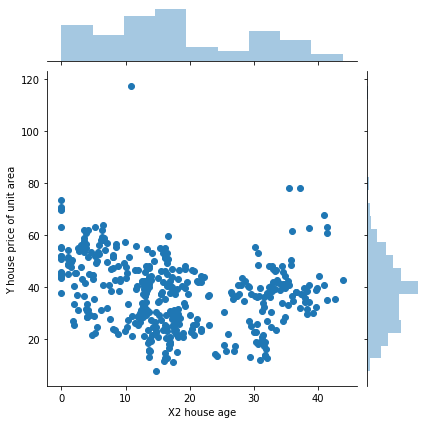

In [9]:
sns.jointplot(x='X2 house age',y='Y house price of unit area',data=data)

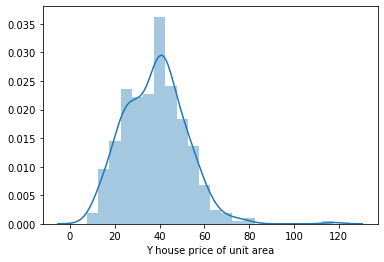

In [10]:
sns.distplot(data['Y house price of unit area'])

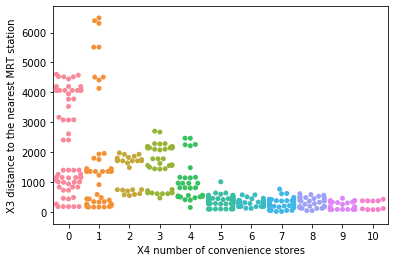

In [11]:
sns.swarmplot(x='X4 number of convenience stores',y='X3 distance to the nearest MRT station',data=data)

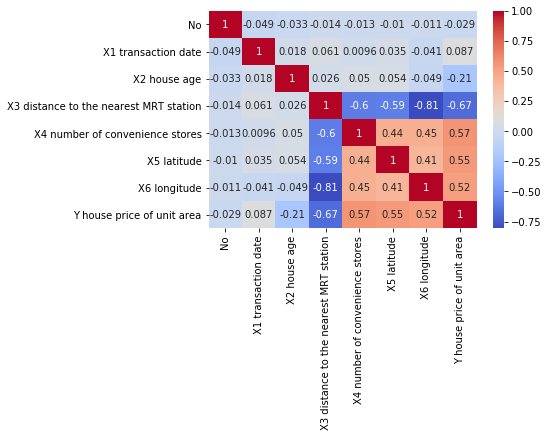

In [12]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

### Cleaning the data

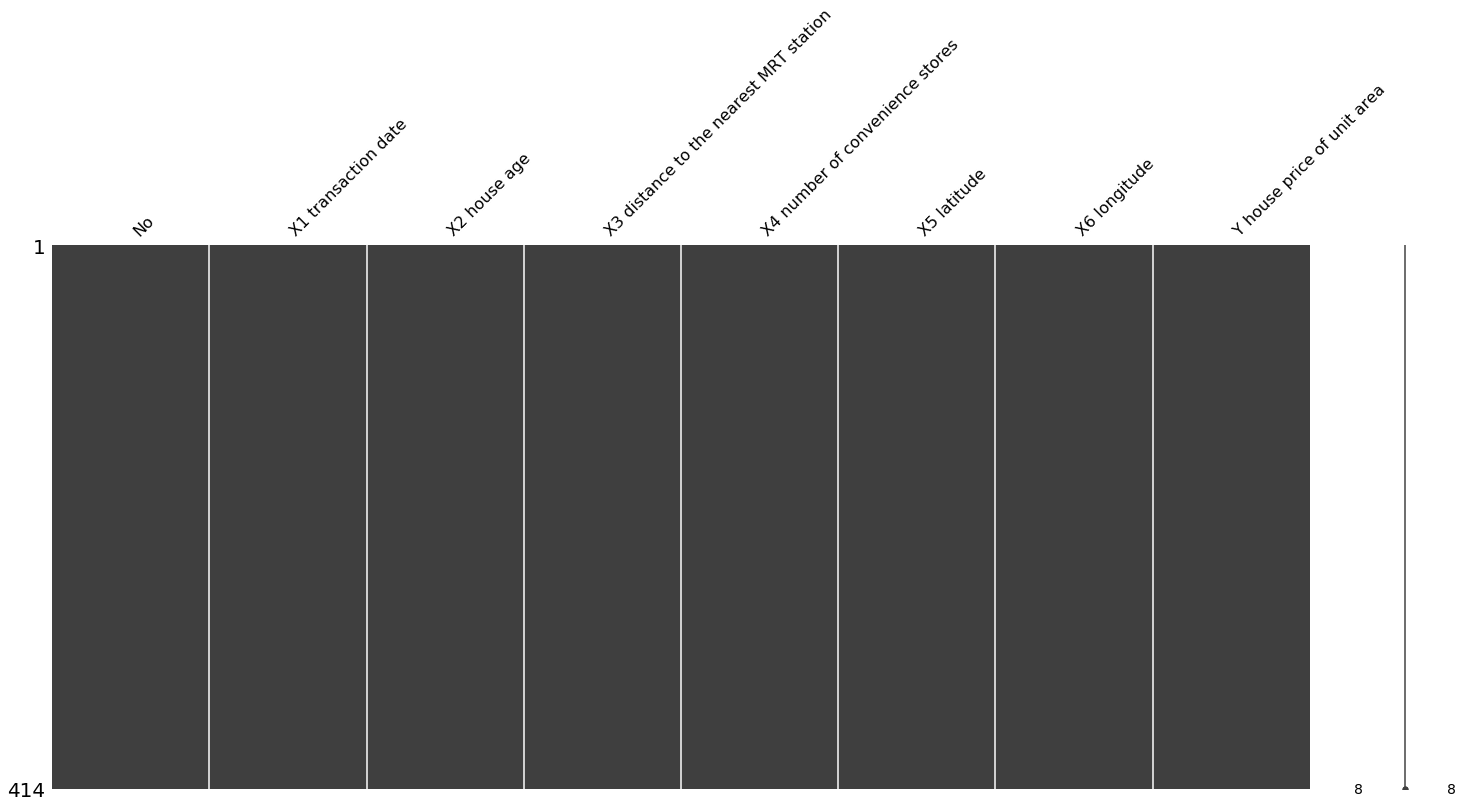

In [13]:
ms.matrix(data)

### Categorical Value Converison

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [15]:
data = data.drop('No',axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [17]:
x = data.drop('Y house price of unit area',axis=1)
y = data['Y house price of unit area']

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [19]:
print(x)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [20]:
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


### Training dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [23]:
X_train.shape

(289, 6)

In [24]:
X_test.shape

(125, 6)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
regressor = RandomForestRegressor(n_estimators=8,random_state=0)

In [80]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=8, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

###  Predicting the model on the test set


In [81]:
Y_pred_test = regressor.predict(X_test)

### Results

In [82]:
Y_test = np.array(Y_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred_test.reshape(len(Y_pred_test),1),Y_test.reshape(len(Y_test),1)),1))


[[14.69 19.2 ]
 [22.29 11.2 ]
 [21.61 24.7 ]
 [44.7  46.1 ]
 [25.94 31.3 ]
 [37.14 31.1 ]
 [37.89 30.5 ]
 [43.59 42.2 ]
 [53.25 51.  ]
 [45.26 39.1 ]
 [39.85 40.  ]
 [31.4  23.  ]
 [39.21 43.1 ]
 [24.1  30.6 ]
 [45.81 53.3 ]
 [41.78 47.1 ]
 [30.44 43.5 ]
 [47.2  44.  ]
 [47.51 39.5 ]
 [46.38 47.7 ]
 [38.74 50.2 ]
 [60.87 63.9 ]
 [46.69 53.3 ]
 [48.26 60.7 ]
 [24.76 30.6 ]
 [48.55 47.7 ]
 [27.11 34.6 ]
 [47.54 48.  ]
 [33.85 48.2 ]
 [42.06 43.2 ]
 [49.69 43.2 ]
 [39.36 40.5 ]
 [33.29 36.3 ]
 [47.85 38.4 ]
 [35.28 36.7 ]
 [21.51 17.4 ]
 [42.5  39.  ]
 [25.45 28.9 ]
 [21.51 18.8 ]
 [54.24 49.8 ]
 [24.36 23.1 ]
 [35.46 48.5 ]
 [17.68 19.1 ]
 [54.66 57.8 ]
 [45.45 34.1 ]
 [33.42 44.  ]
 [41.64 39.6 ]
 [24.79 30.7 ]
 [43.21 40.2 ]
 [37.86 36.5 ]
 [32.89 40.6 ]
 [37.59 28.5 ]
 [41.75 43.8 ]
 [21.05 25.3 ]
 [32.33 36.8 ]
 [49.11 45.9 ]
 [44.92 42.5 ]
 [33.03 26.5 ]
 [38.58 38.2 ]
 [42.42 37.4 ]
 [38.   42.9 ]
 [52.58 43.5 ]
 [39.7  38.9 ]
 [44.18 41.9 ]
 [51.4  44.9 ]
 [41.69 40.6 ]
 [23.46 20

### R-squared score

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score(Y_test,Y_pred_test)

0.70623014132734